**Invoice prediction date for late payment**

In [ ]:
import pandas as pd

**Mounting on the google drive to import csv file**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Reading the CSV file**

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/H2HBABBA3081.csv")

#Seeing the dataframe

In [ ]:
df = pd.DataFrame(data)
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH llc,2019-05-13 00:00:00,2019.0,1.929218e+09,2019-04-26,20190427,20190426,20190511.0,USD,RV,1.0,NaN,42605.95,20190426.0,NAC6,1.929218e+09,0
1,U001,200803720,DEC,2019-07-24 00:00:00,2019.0,1.929650e+09,2019-07-23,20190723,20190723,20190723.0,USD,RV,1.0,NaN,7306.09,20190716.0,NAM1,1.929650e+09,0
2,U001,0200759878,SA corp,2020-01-21 00:00:00,2020.0,1.930354e+09,2020-01-04,20200104,20200104,20200119.0,USD,RV,1.0,NaN,34403.75,20200104.0,NAH4,1.930354e+09,0
3,U001,0200881076,ALBERT trust,2019-06-27 00:00:00,2019.0,1.929480e+09,2019-06-12,20190612,20190612,20190627.0,USD,RV,1.0,NaN,110529.74,20190612.0,NAA8,1.929480e+09,0
4,U001,0200769623,WAL-MAR associates,2019-10-02 00:00:00,2019.0,1.929908e+09,2019-09-22,20190921,20190922,20191007.0,USD,RV,1.0,NaN,3476.03,20190922.0,NAH4,1.929908e+09,0


In [ ]:
df.shape

(50000, 19)

**Dropping any column that contains all null**

In [ ]:
df = df.dropna(axis=1,how="all")
df.shape

(50000, 18)

**Getting all the rows that has null in the clear_date**

This dataframe will our main dataframe for which we have to predict, I named it as null_df because it contains clear_data as null

In [ ]:
null_df = df[df['clear_date'].isnull()]
null_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10,U001,0200761734,H E BUT associates,NaN,2020.0,1.930774e+09,2020-04-09,20200410,20200409,20200424.0,USD,RV,1.0,45512.20,20200409.0,NAA8,1.930774e+09,1
14,U001,0200744019,TARG corp,NaN,2020.0,1.930707e+09,2020-03-28,20200326,20200328,20200412.0,USD,RV,1.0,44995.84,20200328.0,NAA8,1.930707e+09,1
17,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930717e+09,2020-03-29,20200329,20200329,20200413.0,USD,RV,1.0,5081.63,20200329.0,NAH4,1.930717e+09,1
18,U001,0200769623,WAL-MAR,NaN,2020.0,1.930727e+09,2020-04-01,20200331,20200401,20200416.0,USD,RV,1.0,12249.55,20200401.0,NAH4,1.930727e+09,1
20,U001,0200769623,WAL-MAR trust,NaN,2020.0,1.930819e+09,2020-04-25,20200423,20200425,20200510.0,USD,RV,1.0,4486.74,20200425.0,NAH4,1.930819e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49982,U001,0200726979,BJ'S foundation,NaN,2020.0,1.930690e+09,2020-03-23,20200323,20200323,20200407.0,USD,RV,1.0,772.56,20200323.0,NAA8,1.930690e+09,1
49985,U001,0200726979,BJ'S co,NaN,2020.0,1.930731e+09,2020-04-02,20200401,20200402,20200417.0,USD,RV,1.0,217.69,20200402.0,NAA8,1.930731e+09,1
49993,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930623e+09,2020-03-09,20200309,20200309,20200324.0,USD,RV,1.0,12744.43,20200309.0,NAH4,1.930623e+09,1
49998,U001,0200794332,COST trust,NaN,2020.0,1.930666e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,16297.21,20200319.0,NAAX,1.930666e+09,1


**Dropping any row that contains null from the df**

In [ ]:
df = df.dropna(how="any")
df.shape

(39993, 18)

**Removing the duplicate values from df**

Counting duplicate rows in the dataframe

In [ ]:
df.duplicated().sum()

826

Seeing the duplicate rows in dataframe

In [ ]:
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
2132,U001,CCU013,KRAFT F systems,2020-03-27 00:00:00,2020.0,1.930490e+09,2020-02-10,20200206,20200210,20200210.0,USD,RV,1.0,29593.31,20200210.0,NAX2,1.930490e+09,0
2176,U002,0100036009,JOSE us,2019-05-29 00:00:00,2019.0,1.990567e+09,2019-04-17,20190415,20190417,20190522.0,USD,RV,1.0,13847.20,20190417.0,NAG2,1.990567e+09,0
3150,U001,200769623,WAL-MAR corp,2019-03-18 00:00:00,2019.0,1.928920e+09,2019-03-07,20190306,20190307,20190322.0,USD,RV,1.0,9663.53,20190307.0,NAH4,1.928920e+09,0
4144,U001,0200353024,DECA llc,2020-01-27 00:00:00,2020.0,1.930444e+09,2020-01-27,20200127,20200127,20200126.0,USD,RV,1.0,527.88,20200116.0,NAM2,1.930444e+09,0
4453,CA02,0140104429,COSTCO llc,2019-11-29 00:00:00,2019.0,2.960592e+09,2019-11-10,20191110,20191110,20191122.0,CAD,RV,1.0,24743.63,20191112.0,CA10,2.960592e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49870,U001,0200759878,SA in,2019-04-30 00:00:00,2019.0,1.929136e+09,2019-04-13,20190412,20190413,20190428.0,USD,RV,1.0,14747.01,20190413.0,NAH4,1.929136e+09,0
49942,U001,0200704858,WAKE,2019-11-12 00:00:00,2019.0,1.930054e+09,2019-10-26,20191025,20191026,20191110.0,USD,RV,1.0,46433.77,20191026.0,NAA8,1.930054e+09,0
49950,U001,0100033268,NICHOL,2019-09-17 00:00:00,2019.0,1.929828e+09,2019-09-04,20190904,20190904,20190919.0,USD,RV,1.0,26607.14,20190904.0,NAA8,1.929828e+09,0
49971,U001,200793568,SUPE trust,2019-03-15 00:00:00,2019.0,1.928870e+09,2019-02-27,20190227,20190227,20190314.0,USD,RV,1.0,10183.10,20190227.0,NAA8,1.928870e+09,0


Removing the duplicate rows but keeping its first occurance

In [ ]:
dfunique = df.drop_duplicates(keep='first').T
df = dfunique.transpose()

In [ ]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200762301,C&S WH llc,2019-05-13 00:00:00,2019,1.92922e+09,2019-04-26,20190427,20190426,2.01905e+07,USD,RV,1,42605.9,2.01904e+07,NAC6,1.92922e+09,0
1,U001,200803720,DEC,2019-07-24 00:00:00,2019,1.92965e+09,2019-07-23,20190723,20190723,2.01907e+07,USD,RV,1,7306.09,2.01907e+07,NAM1,1.92965e+09,0
2,U001,0200759878,SA corp,2020-01-21 00:00:00,2020,1.93035e+09,2020-01-04,20200104,20200104,2.02001e+07,USD,RV,1,34403.8,2.02001e+07,NAH4,1.93035e+09,0
3,U001,0200881076,ALBERT trust,2019-06-27 00:00:00,2019,1.92948e+09,2019-06-12,20190612,20190612,2.01906e+07,USD,RV,1,110530,2.01906e+07,NAA8,1.92948e+09,0
4,U001,0200769623,WAL-MAR associates,2019-10-02 00:00:00,2019,1.92991e+09,2019-09-22,20190921,20190922,2.0191e+07,USD,RV,1,3476.03,2.01909e+07,NAH4,1.92991e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49992,U001,0200129450,NU,2020-02-24 00:00:00,2020,1.93042e+09,2020-01-22,20200121,20200122,2.02002e+07,USD,RV,1,69188.5,2.02001e+07,NAD5,1.93042e+09,0
49994,U001,0200704858,WAKE systems,2019-03-18 00:00:00,2019,1.92891e+09,2019-03-06,20190306,20190306,2.01903e+07,USD,RV,1,136803,2.01903e+07,NAA8,1.92891e+09,0
49995,U001,0200769623,WAL-MAR co,2019-09-20 00:00:00,2019,1.92985e+09,2019-09-10,20190909,20190910,2.01909e+07,USD,RV,1,33711.8,2.01909e+07,NAH4,1.92985e+09,0
49996,CA02,0140105785,SHOPPE us,2019-06-07 00:00:00,2019,2.96055e+09,2019-05-16,20190516,20190516,2.01905e+07,CAD,RV,1,50503.3,2.01905e+07,CA10,2.96055e+09,0


**Confirming that their is no null value in the dataframe**

In [ ]:
df.isnull().sum().sum()

0

**Removing the duplicate values from the null_df**

Seeing the duplicated values in out data frame that contains clear_date as null

In [ ]:
null_df[null_df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1703,U001,0100001196,DOLLAR corporation,NaN,2020.0,1.930800e+09,2020-04-19,20200418,20200419,20200504.0,USD,RV,1.0,70059.55,20200419.0,NAA8,1.930800e+09,1
2769,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930707e+09,2020-03-27,20200326,20200327,20200411.0,USD,RV,1.0,12630.06,20200327.0,NAH4,1.930707e+09,1
3398,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930783e+09,2020-04-14,20200414,20200414,20200429.0,USD,RV,1.0,9820.55,20200414.0,NAH4,1.930783e+09,1
4231,U001,0200466603,SMITH'S us,NaN,2020.0,1.930777e+09,2020-04-12,20200411,20200412,20200427.0,USD,RV,1.0,44486.38,20200412.0,NAA8,1.930777e+09,1
5599,U001,0200777735,NASH us,NaN,2020.0,1.930857e+09,2020-05-04,20200504,20200504,20200519.0,USD,RV,1.0,11787.86,20200504.0,NAA8,1.930857e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49652,U001,0200759878,SA llc,NaN,2020.0,1.930666e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,4061.53,20200319.0,NAH4,1.930666e+09,1
49770,U001,0200749782,KROG associates,NaN,2020.0,1.930793e+09,2020-04-17,20200416,20200417,20200502.0,USD,RV,1.0,38087.00,20200417.0,NAA8,1.930793e+09,1
49867,U001,0200769623,WAL-MAR associates,NaN,2020.0,1.930801e+09,2020-04-19,20200418,20200419,20200504.0,USD,RV,1.0,11615.43,20200419.0,NAH4,1.930801e+09,1
49919,U001,0200756072,REINHA in,NaN,2020.0,1.930753e+09,2020-04-09,20200406,20200409,20200424.0,USD,RV,1.0,9875.78,20200409.0,NAA8,1.930753e+09,1


Dropping the duplicated values from the null_df

In [ ]:
null_dfunique = null_df.drop_duplicates(keep='first').T
null_df = null_dfunique.transpose()

In [ ]:
null_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10,U001,0200761734,H E BUT associates,NaN,2020,1.93077e+09,2020-04-09,20200410,20200409,2.02004e+07,USD,RV,1,45512.2,2.02004e+07,NAA8,1.93077e+09,1
14,U001,0200744019,TARG corp,NaN,2020,1.93071e+09,2020-03-28,20200326,20200328,2.02004e+07,USD,RV,1,44995.8,2.02003e+07,NAA8,1.93071e+09,1
17,U001,0200769623,WAL-MAR us,NaN,2020,1.93072e+09,2020-03-29,20200329,20200329,2.02004e+07,USD,RV,1,5081.63,2.02003e+07,NAH4,1.93072e+09,1
18,U001,0200769623,WAL-MAR,NaN,2020,1.93073e+09,2020-04-01,20200331,20200401,2.02004e+07,USD,RV,1,12249.5,2.02004e+07,NAH4,1.93073e+09,1
20,U001,0200769623,WAL-MAR trust,NaN,2020,1.93082e+09,2020-04-25,20200423,20200425,2.02005e+07,USD,RV,1,4486.74,2.02004e+07,NAH4,1.93082e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,U001,200148860,DOLLA systems,NaN,2020,1.93072e+09,2020-03-28,20200328,20200328,2.02006e+07,USD,RV,1,4557.11,2.02003e+07,NAGD,1.93072e+09,1
49985,U001,0200726979,BJ'S co,NaN,2020,1.93073e+09,2020-04-02,20200401,20200402,2.02004e+07,USD,RV,1,217.69,2.02004e+07,NAA8,1.93073e+09,1
49993,U001,0200769623,WAL-MAR associates,NaN,2020,1.93062e+09,2020-03-09,20200309,20200309,2.02003e+07,USD,RV,1,12744.4,2.02003e+07,NAH4,1.93062e+09,1
49998,U001,0200794332,COST trust,NaN,2020,1.93067e+09,2020-03-19,20200318,20200319,2.02004e+07,USD,RV,1,16297.2,2.02003e+07,NAAX,1.93067e+09,1


**Sorting the df based on the posting_date**

In [ ]:
df = df.sort_values(by="posting_date")
df = df.reset_index(drop=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200744019,TARG in,2019-01-11 00:00:00,2019,1.92853e+09,2018-12-30,20181229,20181230,2.01901e+07,USD,RV,1,9787.68,2.01812e+07,NAA8,1.92853e+09,0
1,U001,0200794332,COST,2019-01-16 00:00:00,2019,1.92853e+09,2018-12-30,20181229,20181230,2.01901e+07,USD,RV,1,37533.6,2.01812e+07,NAAX,1.92853e+09,0
2,U001,0200707822,PUBLI llc,2019-01-14 00:00:00,2019,1.92854e+09,2018-12-30,20181230,20181230,2.01901e+07,USD,RV,1,108170,2.01812e+07,NAA8,1.92854e+09,0
3,U001,0200769623,WAL-MAR co,2019-01-09 00:00:00,2019,1.92854e+09,2018-12-30,20181230,20181230,2.01901e+07,USD,RV,1,42932.7,2.01812e+07,NAH4,1.92854e+09,0
4,U001,0200726979,BJ'S corporation,2019-01-15 00:00:00,2019,1.92854e+09,2018-12-30,20181229,20181230,2.01901e+07,USD,RV,1,185.1,2.01812e+07,NAA8,1.92854e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39162,U001,0200759878,SA us,2020-03-16 00:00:00,2020,1.93056e+09,2020-02-26,20200225,20200226,2.02003e+07,USD,RV,1,29237.8,2.02002e+07,NAH4,1.93056e+09,0
39163,U001,0100004536,BAS systems,2020-03-12 00:00:00,2020,1.93057e+09,2020-02-27,20200226,20200227,2.02003e+07,USD,RV,1,18509.9,2.02002e+07,NAA8,1.93057e+09,0
39164,U001,0200721222,GO in,2020-03-13 00:00:00,2020,1.93057e+09,2020-02-27,20200226,20200227,2.02003e+07,USD,RV,1,6990.72,2.02002e+07,NAA8,1.93057e+09,0
39165,U001,0200794332,COST llc,2020-03-12 00:00:00,2020,1.93058e+09,2020-02-27,20200227,20200227,2.02003e+07,USD,RV,1,77997.5,2.02002e+07,NAAX,1.93058e+09,0


#Data Preprocessing

**Checking datatype for each column**

In [ ]:
df.dtypes

business_code             object
cust_number               object
name_customer             object
clear_date                object
buisness_year             object
doc_id                    object
posting_date              object
document_create_date      object
document_create_date.1    object
due_in_date               object
invoice_currency          object
document type             object
posting_id                object
total_open_amount         object
baseline_create_date      object
cust_payment_terms        object
invoice_id                object
isOpen                    object
dtype: object

**Changing the datatype of the total_open_amount to float**

In [ ]:
df["total_open_amount"] = df["total_open_amount"].astype(float)

**See the correlation between different date columns in the dataframe**

Removing the '-' from the posting _date column

In [ ]:
df_trial = df[['posting_date','document_create_date','document_create_date.1','baseline_create_date']]
df_trial['posting_date'] = df_trial['posting_date'].str.replace('-','')
df_trial['posting_date']=df_trial['posting_date'].astype('int64')
df_trial['document_create_date']=df_trial['document_create_date'].astype('int64')
df_trial['document_create_date.1']=df_trial['document_create_date.1'].astype('int64')
df_trial['baseline_create_date']=df_trial['baseline_create_date'].astype('int64')

df_trial

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,posting_date,document_create_date,document_create_date.1,baseline_create_date
0,20181230,20181229,20181230,20181230
1,20181230,20181229,20181230,20181230
2,20181230,20181230,20181230,20181230
3,20181230,20181230,20181230,20181230
4,20181230,20181229,20181230,20181230
...,...,...,...,...
39162,20200226,20200225,20200226,20200226
39163,20200227,20200226,20200227,20200227
39164,20200227,20200226,20200227,20200227
39165,20200227,20200227,20200227,20200227


**Checking the relation between these columns**

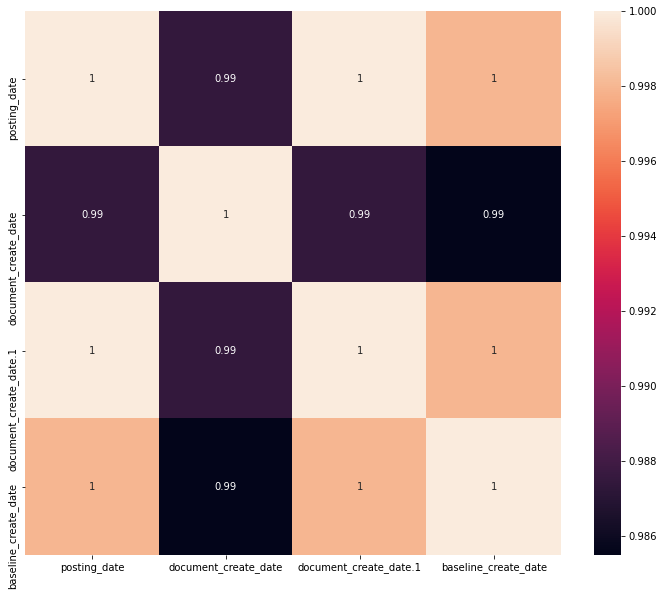

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df_trial.corr()
sns.heatmap(cor,annot=True)
plt.show()

**From the above heatmap we can see that these columns are highly correlated so these columns should be remove as they will not add any value to our model**

**As we can see the date are of datatype object so convert it into the datatime formate**

In [ ]:
df[['clear_date','posting_date']] = df[['clear_date','posting_date']].apply(pd.to_datetime)
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                     object
doc_id                            object
posting_date              datetime64[ns]
document_create_date              object
document_create_date.1            object
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                        object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                        object
isOpen                            object
dtype: object

**Dropping columns which do not help in prediction**

In [ ]:
df = df.drop(['document type','document_create_date.1','buisness_year','doc_id','invoice_id','document_create_date','baseline_create_date'],axis=1)
df

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen
0,U001,0200744019,TARG in,2019-01-11,2018-12-30,2019-01-14,USD,1,9787.68,NAA8,0
1,U001,0200794332,COST,2019-01-16,2018-12-30,2019-01-14,USD,1,37533.61,NAAX,0
2,U001,0200707822,PUBLI llc,2019-01-14,2018-12-30,2019-01-14,USD,1,108170.10,NAA8,0
3,U001,0200769623,WAL-MAR co,2019-01-09,2018-12-30,2019-01-14,USD,1,42932.73,NAH4,0
4,U001,0200726979,BJ'S corporation,2019-01-15,2018-12-30,2019-01-14,USD,1,185.10,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...
39162,U001,0200759878,SA us,2020-03-16,2020-02-26,2020-03-12,USD,1,29237.82,NAH4,0
39163,U001,0100004536,BAS systems,2020-03-12,2020-02-27,2020-03-13,USD,1,18509.90,NAA8,0
39164,U001,0200721222,GO in,2020-03-13,2020-02-27,2020-03-13,USD,1,6990.72,NAA8,0
39165,U001,0200794332,COST llc,2020-03-12,2020-02-27,2020-03-13,USD,1,77997.49,NAAX,0


**Adding the column which can tell the number of days taken to clear the payment. This will act as our target column**

In [ ]:
df['accday_for_payment'] = (df['clear_date']-df['posting_date']).dt.days
df[['due_in_date','posting_date','clear_date','accday_for_payment']]

,due_in_date,posting_date,clear_date,accday_for_payment
0,2019-01-14,2018-12-30,2019-01-11,12
1,2019-01-14,2018-12-30,2019-01-16,17
2,2019-01-14,2018-12-30,2019-01-14,15
3,2019-01-14,2018-12-30,2019-01-09,10
4,2019-01-14,2018-12-30,2019-01-15,16
...,...,...,...,...
39162,2020-03-12,2020-02-26,2020-03-16,19
39163,2020-03-13,2020-02-27,2020-03-12,14
39164,2020-03-13,2020-02-27,2020-03-13,15
39165,2020-03-13,2020-02-27,2020-03-12,14


**Checking any negative value in accday_for_payment column**

In [ ]:
s = df['accday_for_payment']
any(s<0)

False

Checking how many unique values are their in the business_code,cust_number,name_customer and invoice_currency , this will help in deciding the type of encoder to use

In [ ]:
df['business_code'].nunique()

5

In [ ]:
df['cust_number'].nunique()

1296

In [ ]:
df['name_customer'].nunique()

3832

In [ ]:
df['invoice_currency'].nunique()

2

In [ ]:
df['cust_payment_terms'].nunique()

71

**As their is not much unique value as compared to the length of any particular column so we use labelencoder**

**Encoding the object datatype for df using labelencoder**

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['business_code']= label_encoder.fit_transform(df['business_code'])
df['cust_number']= label_encoder.fit_transform(df['cust_number'])
df['name_customer']= label_encoder.fit_transform(df['name_customer'])
df['invoice_currency']= label_encoder.fit_transform(df['invoice_currency'])
df['cust_payment_terms']= label_encoder.fit_transform(df['cust_payment_terms'])

df

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment
0,1,753,3427,2019-01-11,2018-12-30,2019-01-14,1,1,9787.68,21,0,12
1,1,880,745,2019-01-16,2018-12-30,2019-01-14,1,1,37533.61,23,0,17
2,1,680,2768,2019-01-14,2018-12-30,2019-01-14,1,1,108170.10,21,0,15
3,1,809,3703,2019-01-09,2018-12-30,2019-01-14,1,1,42932.73,35,0,10
4,1,711,380,2019-01-15,2018-12-30,2019-01-14,1,1,185.10,21,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
39162,1,787,2970,2020-03-16,2020-02-26,2020-03-12,1,1,29237.82,35,0,19
39163,1,18,294,2020-03-12,2020-02-27,2020-03-13,1,1,18509.90,21,0,14
39164,1,700,1368,2020-03-13,2020-02-27,2020-03-13,1,1,6990.72,21,0,15
39165,1,880,752,2020-03-12,2020-02-27,2020-03-13,1,1,77997.49,23,0,14


Again checking the datatype of all the columns

In [ ]:
df.dtypes

business_code                  int64
cust_number                    int64
name_customer                  int64
clear_date            datetime64[ns]
posting_date          datetime64[ns]
due_in_date           datetime64[ns]
invoice_currency               int64
posting_id                    object
total_open_amount            float64
cust_payment_terms             int64
isOpen                        object
accday_for_payment             int64
dtype: object

**Converting posting_id and isOpen to integer from object**

In [ ]:
df["posting_id"] = df["posting_id"].astype(int)
df["isOpen"] = df["isOpen"].astype(int)

df.dtypes

business_code                  int64
cust_number                    int64
name_customer                  int64
clear_date            datetime64[ns]
posting_date          datetime64[ns]
due_in_date           datetime64[ns]
invoice_currency               int64
posting_id                     int64
total_open_amount            float64
cust_payment_terms             int64
isOpen                         int64
accday_for_payment             int64
dtype: object

**Now all the columns are changed to interger or float or datetime**

#EDA

**Splitting the dataframe into three parts train,validate and test**

Splitting df into train and testinitial

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_testinitial = train_test_split(df,test_size=.4)
X_train.shape,X_testinitial.shape

((23500, 12), (15667, 12))

Splitting the X_testinitial
 into validate and test

In [ ]:
X_validate, X_test = train_test_split(X_testinitial,test_size=.5)
X_validate.shape,X_test.shape

((7833, 12), (7834, 12))

**Seeing how the distribution of target columns looks**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


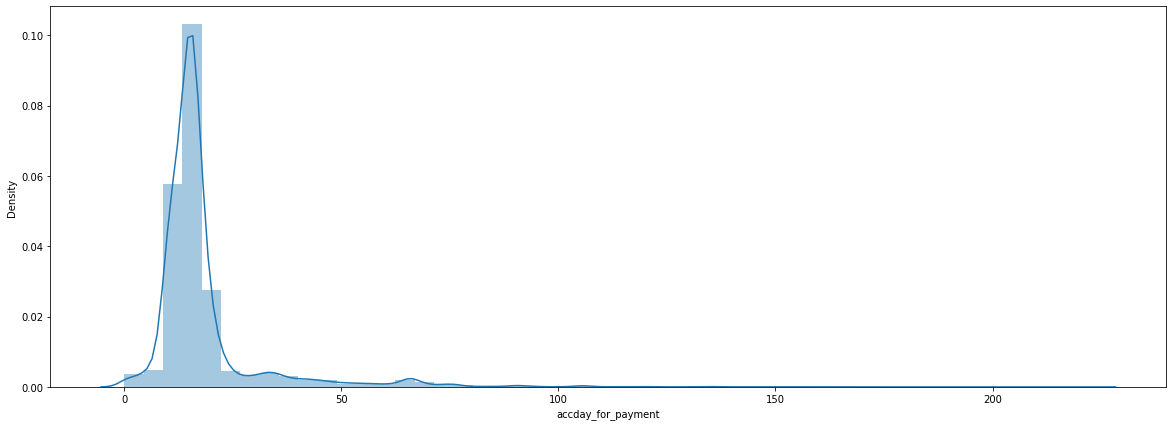

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,7))
sns.distplot(X_train['accday_for_payment'])
plt.show()

In [ ]:
#From above we can see that our target is right skewed
#Target data contains outliers
#Outlines may affect our model accuracy so we will remove the outliers

**Removing outliers from the X_train**

Checking the outliers using boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


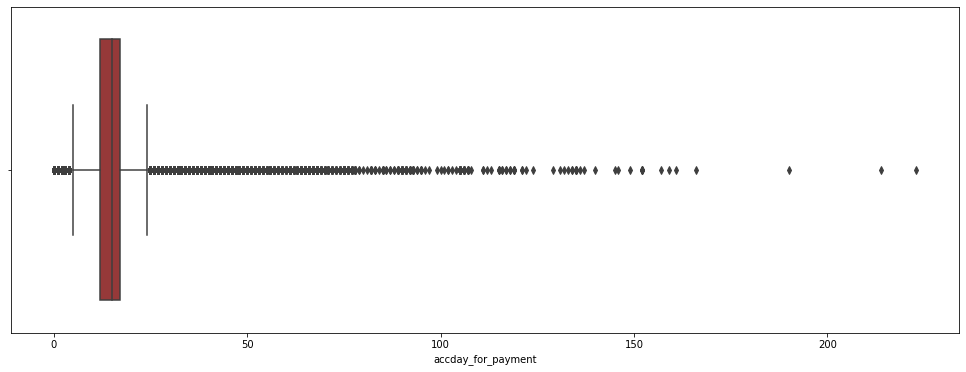

In [ ]:
plt.rcParams['figure.figsize'] = (17,6)
sns.boxplot(X_train['accday_for_payment'],color='brown')

Removing outliers using IQR

In [ ]:
Q1 = X_train['accday_for_payment'].quantile(0.25)
Q3 = X_train['accday_for_payment'].quantile(0.75)

Q1,Q3

(12.0, 17.0)

In [ ]:
IQR = Q3-Q1
IQR

5.0

In [ ]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
lower_limit,upper_limit

(4.5, 24.5)

Checking the outliers data in the X_train

In [ ]:
X_train[(X_train['accday_for_payment']<lower_limit)|(X_train['accday_for_payment']>upper_limit)]

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment
24210,1,796,1514,2019-11-18,2019-09-06,2019-11-20,1,1,17050.31,67,0,73
24365,1,1295,1927,2019-11-01,2019-09-07,2019-09-07,1,1,23539.02,70,0,55
1853,1,825,3580,2019-06-06,2019-01-22,2019-02-06,1,1,364.14,21,0,135
18469,1,676,1002,2019-08-09,2019-07-08,2019-08-09,1,1,74883.04,14,0,32
36144,1,894,859,2020-01-27,2020-01-24,2020-01-23,1,1,19637.69,36,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
21265,1,870,3354,2019-09-24,2019-08-07,2019-09-08,1,1,26016.49,14,0,48
9420,0,379,3442,2019-07-12,2019-04-10,2019-04-21,0,1,110810.63,7,0,93
3124,1,459,2505,2019-03-13,2019-02-05,2019-03-07,1,1,88876.00,31,0,36
28557,1,800,3367,2019-11-25,2019-10-20,2019-11-21,1,1,971.56,14,0,36


**As we can see that their are too many outliers , if we remove these outliers out model will be affected so we will remove the rows that has value greater that 120**

In [ ]:
X_train[(X_train['accday_for_payment']>120)]

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment
1853,1,825,3580,2019-06-06,2019-01-22,2019-02-06,1,1,364.14,21,0,135
3604,4,1284,1576,2019-06-26,2019-02-10,2019-03-27,1,1,308.39,60,0,136
15108,1,943,413,2019-10-23,2019-06-05,2019-07-05,1,1,17596.80,31,0,140
7686,1,1295,1927,2019-08-30,2019-03-24,2019-03-24,1,1,5125.00,70,0,159
4485,4,1289,1558,2019-06-29,2019-02-20,2019-04-06,1,1,4341.03,60,0,129
14004,1,673,3679,2019-10-28,2019-05-24,2019-07-28,1,1,5507.32,34,0,157
8540,4,1283,1556,2019-10-09,2019-04-02,2019-05-17,1,1,18003.44,60,0,190
20746,1,663,3581,2019-12-13,2019-07-31,2019-08-15,1,1,264.03,21,0,135
2700,4,1281,1570,2019-05-31,2019-01-30,2019-03-16,1,1,19605.34,60,0,121
7373,1,0,1304,2019-08-19,2019-03-20,2019-06-18,1,1,29948.88,62,0,152


Removing these rows from the X_train that has value higher than 120

In [ ]:
X_train = X_train[(X_train['accday_for_payment']<=120)]
X_train

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment
24210,1,796,1514,2019-11-18,2019-09-06,2019-11-20,1,1,17050.31,67,0,73
24365,1,1295,1927,2019-11-01,2019-09-07,2019-09-07,1,1,23539.02,70,0,55
11779,1,889,2269,2019-05-17,2019-05-02,2019-05-17,1,1,109.73,21,0,15
36202,1,711,381,2020-02-11,2020-01-25,2020-02-09,1,1,179.57,21,0,17
18607,1,1243,747,2019-07-23,2019-07-09,2019-07-24,1,1,15284.38,23,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
37049,1,283,652,2020-02-19,2020-02-04,2020-04-09,1,1,162.29,34,0,15
3166,1,809,3702,2019-02-21,2019-02-05,2019-02-20,1,1,12476.21,35,0,16
32820,1,524,871,2019-12-10,2019-12-05,2019-12-08,1,1,975.54,36,0,5
32323,1,809,3702,2019-12-10,2019-11-30,2019-12-15,1,1,2352.97,35,0,10


Checking the distribution of the target column as the outliers has been removed

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


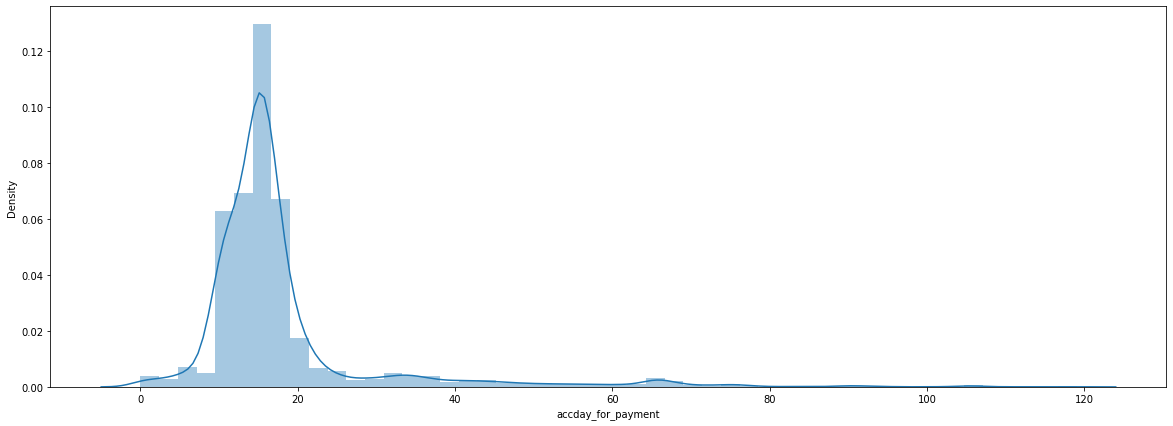

In [ ]:
plt.figure(figsize=(20,7))
sns.distplot(X_train['accday_for_payment'])
plt.show()

**Now our target column looks much better and less skewed**

#Feature Engineering

**Seeing the X_train,X_validate and X_test for feature engineering**

In [ ]:
X_train

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment
24210,1,796,1514,2019-11-18,2019-09-06,2019-11-20,1,1,17050.31,67,0,73
24365,1,1295,1927,2019-11-01,2019-09-07,2019-09-07,1,1,23539.02,70,0,55
11779,1,889,2269,2019-05-17,2019-05-02,2019-05-17,1,1,109.73,21,0,15
36202,1,711,381,2020-02-11,2020-01-25,2020-02-09,1,1,179.57,21,0,17
18607,1,1243,747,2019-07-23,2019-07-09,2019-07-24,1,1,15284.38,23,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
37049,1,283,652,2020-02-19,2020-02-04,2020-04-09,1,1,162.29,34,0,15
3166,1,809,3702,2019-02-21,2019-02-05,2019-02-20,1,1,12476.21,35,0,16
32820,1,524,871,2019-12-10,2019-12-05,2019-12-08,1,1,975.54,36,0,5
32323,1,809,3702,2019-12-10,2019-11-30,2019-12-15,1,1,2352.97,35,0,10


In [ ]:
X_validate

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment
27712,0,379,3443,2019-12-24,2019-10-10,2019-10-29,0,1,31448.52,7,0,75
819,1,628,872,2019-01-10,2019-01-09,2019-01-08,1,1,5949.56,36,0,1
4059,1,809,3709,2019-02-25,2019-02-14,2019-03-01,1,1,58343.46,35,0,11
34581,1,834,2302,2020-01-22,2020-01-06,2020-01-21,1,1,113648.33,21,0,16
5406,1,809,3705,2019-03-12,2019-03-01,2019-03-16,1,1,8469.46,35,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...
20361,1,772,1970,2019-08-12,2019-07-27,2019-08-11,1,1,17283.50,21,0,16
20848,1,809,3702,2019-08-13,2019-08-02,2019-08-17,1,1,3226.45,35,0,11
28322,1,794,521,2019-11-01,2019-10-17,2019-11-01,1,1,18654.40,26,0,15
23156,1,815,231,2019-09-10,2019-08-26,2019-09-10,1,1,59372.92,50,0,15


In [ ]:
X_test

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment
19214,1,499,3033,2019-07-31,2019-07-16,2019-07-31,1,1,45400.00,21,0,15
35795,0,329,26,2020-01-31,2020-01-21,2020-02-02,0,1,922.59,7,0,10
9319,1,149,2366,2019-04-30,2019-04-09,2019-04-24,1,1,9107.70,21,0,21
27590,1,814,2987,2019-10-24,2019-10-09,2019-10-24,1,1,86085.89,21,0,15
3959,1,894,862,2019-02-15,2019-02-13,2019-02-24,1,1,1779.36,39,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9958,1,1295,1920,2019-05-31,2019-04-15,2019-04-15,1,1,6690.20,70,0,46
34619,1,837,1810,2020-01-27,2020-01-07,2020-01-27,1,1,3344.34,29,0,20
17469,1,711,376,2019-07-11,2019-06-26,2019-07-11,1,1,189.80,21,0,15
17392,1,809,3703,2019-07-08,2019-06-26,2019-07-11,1,1,26878.49,35,0,12


**Dropping the clear_date column as we have already extracted the target column from this so now clear_date column has no use for our model**

Dropping the target column from all the splitted dataframe

In [ ]:
X_train = X_train.drop('clear_date',axis = 1)

In [ ]:
X_validate = X_validate.drop('clear_date',axis = 1)

In [ ]:
X_test = X_test.drop('clear_date',axis = 1)

**Getting the number of days after which the payment should have been made, this is the ideal condition for the payment making**

In [ ]:
X_train['days_for_payment'] = (X_train['due_in_date']-X_train['posting_date']).dt.days
X_train[['due_in_date','posting_date','days_for_payment','accday_for_payment']]

,due_in_date,posting_date,days_for_payment,accday_for_payment
24210,2019-11-20,2019-09-06,75,73
24365,2019-09-07,2019-09-07,0,55
11779,2019-05-17,2019-05-02,15,15
36202,2020-02-09,2020-01-25,15,17
18607,2019-07-24,2019-07-09,15,14
...,...,...,...,...
37049,2020-04-09,2020-02-04,65,15
3166,2019-02-20,2019-02-05,15,16
32820,2019-12-08,2019-12-05,3,5
32323,2019-12-15,2019-11-30,15,10


Doing the same thing for the X_validate and X_train

In [ ]:
X_validate['days_for_payment'] = (X_validate['due_in_date']-X_validate['posting_date']).dt.days
X_test['days_for_payment'] = (X_test['due_in_date']-X_test['posting_date']).dt.days

**Taking absolute value for days for payment as days can not be negative**

The negative value arises if the payment has been made before the due_in_date

In [ ]:
X_train['days_for_payment'] = X_train['days_for_payment'].abs()
X_validate['days_for_payment'] = X_validate['days_for_payment'].abs()
X_test['days_for_payment'] = X_test['days_for_payment'].abs()

In [ ]:
X_train

,business_code,cust_number,name_customer,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment,days_for_payment
24210,1,796,1514,2019-09-06,2019-11-20,1,1,17050.31,67,0,73,75
24365,1,1295,1927,2019-09-07,2019-09-07,1,1,23539.02,70,0,55,0
11779,1,889,2269,2019-05-02,2019-05-17,1,1,109.73,21,0,15,15
36202,1,711,381,2020-01-25,2020-02-09,1,1,179.57,21,0,17,15
18607,1,1243,747,2019-07-09,2019-07-24,1,1,15284.38,23,0,14,15
...,...,...,...,...,...,...,...,...,...,...,...,...
37049,1,283,652,2020-02-04,2020-04-09,1,1,162.29,34,0,15,65
3166,1,809,3702,2019-02-05,2019-02-20,1,1,12476.21,35,0,16,15
32820,1,524,871,2019-12-05,2019-12-08,1,1,975.54,36,0,5,3
32323,1,809,3702,2019-11-30,2019-12-15,1,1,2352.97,35,0,10,15


**Splitting the date columns into the multiple features**

Splitting posting_date into days,weeks and months for X_train

In [ ]:
X_train['posting_days'] = X_train['posting_date'].dt.day
X_train['posting_weeks'] = X_train['posting_date'].dt.week
X_train['posting_months'] = X_train['posting_date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


Splitting due_in_date for X_train

In [ ]:
X_train['due_in_days'] = X_train['due_in_date'].dt.day
X_train['due_in_weeks'] = X_train['due_in_date'].dt.week
X_train['due_in_months'] = X_train['due_in_date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
X_train

,business_code,cust_number,name_customer,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment,days_for_payment,posting_days,posting_weeks,posting_months,due_in_days,due_in_weeks,due_in_months
24210,1,796,1514,2019-09-06,2019-11-20,1,1,17050.31,67,0,73,75,6,36,9,20,47,11
24365,1,1295,1927,2019-09-07,2019-09-07,1,1,23539.02,70,0,55,0,7,36,9,7,36,9
11779,1,889,2269,2019-05-02,2019-05-17,1,1,109.73,21,0,15,15,2,18,5,17,20,5
36202,1,711,381,2020-01-25,2020-02-09,1,1,179.57,21,0,17,15,25,4,1,9,6,2
18607,1,1243,747,2019-07-09,2019-07-24,1,1,15284.38,23,0,14,15,9,28,7,24,30,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37049,1,283,652,2020-02-04,2020-04-09,1,1,162.29,34,0,15,65,4,6,2,9,15,4
3166,1,809,3702,2019-02-05,2019-02-20,1,1,12476.21,35,0,16,15,5,6,2,20,8,2
32820,1,524,871,2019-12-05,2019-12-08,1,1,975.54,36,0,5,3,5,49,12,8,49,12
32323,1,809,3702,2019-11-30,2019-12-15,1,1,2352.97,35,0,10,15,30,48,11,15,50,12


Dropping the posting_date and due_in_date from the X_train

In [ ]:
X_train = X_train.drop(['posting_date','due_in_date'],axis = 1)

In [ ]:
X_train

,business_code,cust_number,name_customer,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment,days_for_payment,posting_days,posting_weeks,posting_months,due_in_days,due_in_weeks,due_in_months
24210,1,796,1514,1,1,17050.31,67,0,73,75,6,36,9,20,47,11
24365,1,1295,1927,1,1,23539.02,70,0,55,0,7,36,9,7,36,9
11779,1,889,2269,1,1,109.73,21,0,15,15,2,18,5,17,20,5
36202,1,711,381,1,1,179.57,21,0,17,15,25,4,1,9,6,2
18607,1,1243,747,1,1,15284.38,23,0,14,15,9,28,7,24,30,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37049,1,283,652,1,1,162.29,34,0,15,65,4,6,2,9,15,4
3166,1,809,3702,1,1,12476.21,35,0,16,15,5,6,2,20,8,2
32820,1,524,871,1,1,975.54,36,0,5,3,5,49,12,8,49,12
32323,1,809,3702,1,1,2352.97,35,0,10,15,30,48,11,15,50,12


**Splitting the posting_date and due_in_date for the X_validate**

In [ ]:
X_validate['posting_days'] = X_validate['posting_date'].dt.day
X_validate['posting_weeks'] = X_validate['posting_date'].dt.week
X_validate['posting_months'] = X_validate['posting_date'].dt.month

X_validate['due_in_days'] = X_validate['due_in_date'].dt.day
X_validate['due_in_weeks'] = X_validate['due_in_date'].dt.week
X_validate['due_in_months'] = X_validate['due_in_date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


Dropping those 2 columns from the X_validate

In [ ]:
X_validate = X_validate.drop(['posting_date','due_in_date'],axis = 1)

In [ ]:
X_validate

,business_code,cust_number,name_customer,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment,days_for_payment,posting_days,posting_weeks,posting_months,due_in_days,due_in_weeks,due_in_months
27712,0,379,3443,0,1,31448.52,7,0,75,19,10,41,10,29,44,10
819,1,628,872,1,1,5949.56,36,0,1,1,9,2,1,8,2,1
4059,1,809,3709,1,1,58343.46,35,0,11,15,14,7,2,1,9,3
34581,1,834,2302,1,1,113648.33,21,0,16,15,6,2,1,21,4,1
5406,1,809,3705,1,1,8469.46,35,0,11,15,1,9,3,16,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20361,1,772,1970,1,1,17283.50,21,0,16,15,27,30,7,11,32,8
20848,1,809,3702,1,1,3226.45,35,0,11,15,2,31,8,17,33,8
28322,1,794,521,1,1,18654.40,26,0,15,15,17,42,10,1,44,11
23156,1,815,231,1,1,59372.92,50,0,15,15,26,35,8,10,37,9


**Splitting those two date column from the X_test also**

In [ ]:
X_test['posting_days'] = X_test['posting_date'].dt.day
X_test['posting_weeks'] = X_test['posting_date'].dt.week
X_test['posting_months'] = X_test['posting_date'].dt.month

X_test['due_in_days'] = X_test['due_in_date'].dt.day
X_test['due_in_weeks'] = X_test['due_in_date'].dt.week
X_test['due_in_months'] = X_test['due_in_date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


Dropping these 2 columns fron X_test

In [ ]:
X_test = X_test.drop(['posting_date','due_in_date'],axis = 1)

In [ ]:
X_test

,business_code,cust_number,name_customer,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment,days_for_payment,posting_days,posting_weeks,posting_months,due_in_days,due_in_weeks,due_in_months
19214,1,499,3033,1,1,45400.00,21,0,15,15,16,29,7,31,31,7
35795,0,329,26,0,1,922.59,7,0,10,12,21,4,1,2,5,2
9319,1,149,2366,1,1,9107.70,21,0,21,15,9,15,4,24,17,4
27590,1,814,2987,1,1,86085.89,21,0,15,15,9,41,10,24,43,10
3959,1,894,862,1,1,1779.36,39,0,2,11,13,7,2,24,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9958,1,1295,1920,1,1,6690.20,70,0,46,0,15,16,4,15,16,4
34619,1,837,1810,1,1,3344.34,29,0,20,20,7,2,1,27,5,1
17469,1,711,376,1,1,189.80,21,0,15,15,26,26,6,11,28,7
17392,1,809,3703,1,1,26878.49,35,0,12,15,26,26,6,11,28,7


#Feature Selection

**Finding and removing the constant columns from the dataframe using VarianceThreshold**

We give threshold value 0 and it will find the column that has 0 varience

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

VarianceThreshold(threshold=0)

Getting the constant columns, constant columns are the one that has varience equal to 0

In [ ]:
constant_columns = [column for column in X_train.columns if column not in X_train.columns[sel.get_support()]]
constant_columns

['posting_id', 'isOpen']

**We got 2 contant columns in our X_train dataframe and now we will remove this two constant columns**

In [ ]:
X_train

,business_code,cust_number,name_customer,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen,accday_for_payment,days_for_payment,posting_days,posting_weeks,posting_months,due_in_days,due_in_weeks,due_in_months
24210,1,796,1514,1,1,17050.31,67,0,73,75,6,36,9,20,47,11
24365,1,1295,1927,1,1,23539.02,70,0,55,0,7,36,9,7,36,9
11779,1,889,2269,1,1,109.73,21,0,15,15,2,18,5,17,20,5
36202,1,711,381,1,1,179.57,21,0,17,15,25,4,1,9,6,2
18607,1,1243,747,1,1,15284.38,23,0,14,15,9,28,7,24,30,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37049,1,283,652,1,1,162.29,34,0,15,65,4,6,2,9,15,4
3166,1,809,3702,1,1,12476.21,35,0,16,15,5,6,2,20,8,2
32820,1,524,871,1,1,975.54,36,0,5,3,5,49,12,8,49,12
32323,1,809,3702,1,1,2352.97,35,0,10,15,30,48,11,15,50,12


Removing this constant columns from the X_train

In [ ]:
X_train = X_train.drop(['posting_id','isOpen'],axis=1)
X_train.shape

(23468, 14)

In [ ]:
X_train

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,accday_for_payment,days_for_payment,posting_days,posting_weeks,posting_months,due_in_days,due_in_weeks,due_in_months
24210,1,796,1514,1,17050.31,67,73,75,6,36,9,20,47,11
24365,1,1295,1927,1,23539.02,70,55,0,7,36,9,7,36,9
11779,1,889,2269,1,109.73,21,15,15,2,18,5,17,20,5
36202,1,711,381,1,179.57,21,17,15,25,4,1,9,6,2
18607,1,1243,747,1,15284.38,23,14,15,9,28,7,24,30,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37049,1,283,652,1,162.29,34,15,65,4,6,2,9,15,4
3166,1,809,3702,1,12476.21,35,16,15,5,6,2,20,8,2
32820,1,524,871,1,975.54,36,5,3,5,49,12,8,49,12
32323,1,809,3702,1,2352.97,35,10,15,30,48,11,15,50,12


Removing this contant columns fron the X_validate

In [ ]:
X_validate = X_validate.drop(['posting_id','isOpen'],axis=1)
X_validate.shape

(7833, 14)

Removing the constant columns from the X_test

In [ ]:
X_test = X_test.drop(['posting_id','isOpen'],axis=1)
X_test.shape

(7834, 14)

**Seeing the correlation between the columns in the X_train using the heatmap**

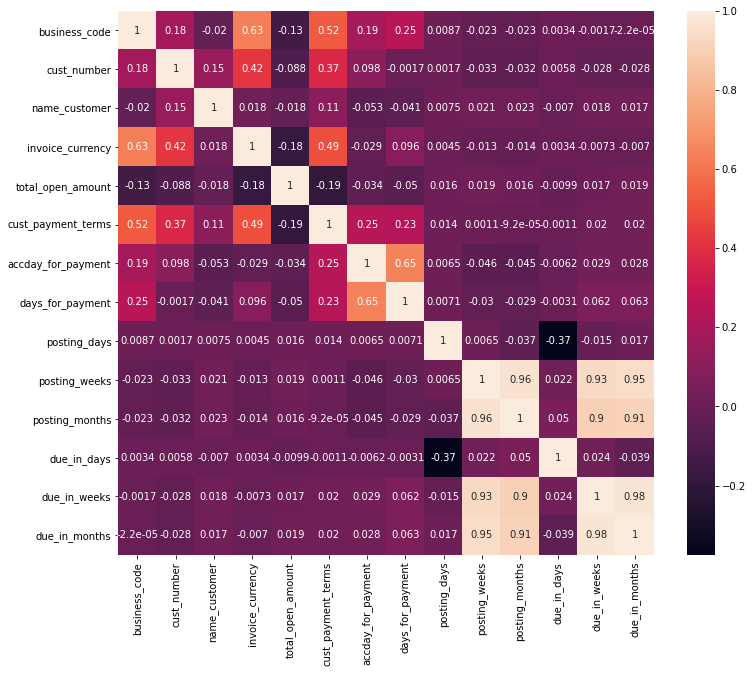

In [ ]:
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor,annot=True)
plt.show()

**We see from the above heatmap that due_in_days,posting_days,due_in_week,posting_week,due_in_months,posting_months are very much less correleated with our target column so we can remove them**

In [ ]:
X_train = X_train.drop(['due_in_days','due_in_weeks','due_in_months','posting_days','posting_weeks','posting_months'],axis=1)

In [ ]:
X_train

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,accday_for_payment,days_for_payment
24210,1,796,1514,1,17050.31,67,73,75
24365,1,1295,1927,1,23539.02,70,55,0
11779,1,889,2269,1,109.73,21,15,15
36202,1,711,381,1,179.57,21,17,15
18607,1,1243,747,1,15284.38,23,14,15
...,...,...,...,...,...,...,...,...
37049,1,283,652,1,162.29,34,15,65
3166,1,809,3702,1,12476.21,35,16,15
32820,1,524,871,1,975.54,36,5,3
32323,1,809,3702,1,2352.97,35,10,15


**Removing all those columns from X_validate and X_test also**

In [ ]:
X_validate = X_validate.drop(['due_in_days','due_in_weeks','due_in_months','posting_days','posting_weeks','posting_months'],axis=1)

In [ ]:
X_validate

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,accday_for_payment,days_for_payment
27712,0,379,3443,0,31448.52,7,75,19
819,1,628,872,1,5949.56,36,1,1
4059,1,809,3709,1,58343.46,35,11,15
34581,1,834,2302,1,113648.33,21,16,15
5406,1,809,3705,1,8469.46,35,11,15
...,...,...,...,...,...,...,...,...
20361,1,772,1970,1,17283.50,21,16,15
20848,1,809,3702,1,3226.45,35,11,15
28322,1,794,521,1,18654.40,26,15,15
23156,1,815,231,1,59372.92,50,15,15


In [ ]:
X_test = X_test.drop(['due_in_days','due_in_weeks','due_in_months','posting_days','posting_weeks','posting_months'],axis=1)

In [ ]:
X_test

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,accday_for_payment,days_for_payment
19214,1,499,3033,1,45400.00,21,15,15
35795,0,329,26,0,922.59,7,10,12
9319,1,149,2366,1,9107.70,21,21,15
27590,1,814,2987,1,86085.89,21,15,15
3959,1,894,862,1,1779.36,39,2,11
...,...,...,...,...,...,...,...,...
9958,1,1295,1920,1,6690.20,70,46,0
34619,1,837,1810,1,3344.34,29,20,20
17469,1,711,376,1,189.80,21,15,15
17392,1,809,3703,1,26878.49,35,12,15


**Splitting the X_train into X_train and y_train**

In [ ]:
y_train = X_train['accday_for_payment']
X_train = X_train.drop(['accday_for_payment'],axis=1)
X_train.shape,y_train.shape

((23468, 7), (23468,))

**Splitting the X_validate into X_validate and y_validate**

In [ ]:
y_validate = X_validate['accday_for_payment']
X_validate = X_validate.drop(['accday_for_payment'],axis=1)
X_validate.shape,y_validate.shape

((7833, 7), (7833,))

**Splitting the X_test into X_test and y_test**

In [ ]:
y_test = X_test['accday_for_payment']
X_test = X_test.drop(['accday_for_payment'],axis=1)
X_test.shape,y_test.shape

((7834, 7), (7834,))

**Combining the X_train,X_validate and X_test dataframe into one single dataframe. <br>This combined dataframe will be used to train the final model which will be used to make final prediction on the null_df.<br>null_df is one which containd clear_date column as NAN value**

In [ ]:
main_df_ini = X_train.append(X_validate)

In [ ]:
main_df = main_df_ini.append(X_test)

In [ ]:
main_df

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,days_for_payment
24210,1,796,1514,1,17050.31,67,75
24365,1,1295,1927,1,23539.02,70,0
11779,1,889,2269,1,109.73,21,15
36202,1,711,381,1,179.57,21,15
18607,1,1243,747,1,15284.38,23,15
...,...,...,...,...,...,...,...
9958,1,1295,1920,1,6690.20,70,0
34619,1,837,1810,1,3344.34,29,20
17469,1,711,376,1,189.80,21,15
17392,1,809,3703,1,26878.49,35,15


In [ ]:
main_df_ini_train = y_train.append(y_validate)
main_df_train = main_df_ini_train.append(y_test)

In [ ]:
main_df_train

24210    73
24365    55
11779    15
36202    17
18607    14
         ..
9958     46
34619    20
17469    15
17392    12
30058    12
Name: accday_for_payment, Length: 39135, dtype: int64

#Modeling

<br>
The Metric being used in Model Testing are - 

1. `MSE`: Mean Square Error. (measure of how well a regression line fits the data points)
2. `r2 score`. (R-squared is a statistical measure of how close the data are to the fitted regression line.)

I have used 6 list to find the table to compare the models.<br> One with '_test' at the end of its name is for the predicted value for the test dataset while other is for the validate dataset 

In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []

MSE_Score_test = []
R2_Score_test = []
Algorithm_test = []

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Algorithm.append('Linear Regression')
clf_lreg = LinearRegression()
clf_lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting the X_validate**

In [ ]:
y_pred = clf_lreg.predict(X_validate)
y_pred

array([21.99857297,  6.16595198, 16.09158164, ..., 16.6031704 ,
       20.09579418, 48.80538774])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE_Score.append(mean_squared_error(y_validate,y_pred))
R2_Score.append(r2_score(y_validate,y_pred))

**Predicting for X_test data set**

In [ ]:
Algorithm_test.append('Linear Regression')
y_pred = clf_lreg.predict(X_test)
y_pred

array([12.01633779, 18.44458177,  9.46771681, ..., 15.33564348,
       16.1152847 , 17.9936487 ])

In [ ]:
MSE_Score_test.append(mean_squared_error(y_test,y_pred))
R2_Score_test.append(r2_score(y_test,y_pred))

**Support Vector Regression**

In [ ]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
clf_svr = SVR()
clf_svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**Predicting for X_validation**

In [ ]:
y_pred = clf_svr.predict(X_validate)
y_pred

array([14.87245959, 15.1588067 , 14.75700562, ..., 15.33102511,
       15.22047907, 15.03652235])

In [ ]:
MSE_Score.append(mean_squared_error(y_validate,y_pred))
R2_Score.append(r2_score(y_validate,y_pred))

**Predicting for X_test**

In [ ]:
Algorithm_test.append('Support Vector Regression')
y_pred = clf_svr.predict(X_test)
y_pred

array([14.83215447, 15.11538906, 15.01463433, ..., 15.09079792,
       14.89596826, 15.08910272])

In [ ]:
MSE_Score_test.append(mean_squared_error(y_test,y_pred))
R2_Score_test.append(r2_score(y_test,y_pred))

**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
Algorithm.append('Decision Tree Regressor')
clf_dreg = DecisionTreeRegressor()
clf_dreg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

**Predicting for X_validate**

In [ ]:
y_pred = clf_dreg.predict(X_validate)
y_pred

array([75.,  1., 10., ..., 15., 16., 48.])

In [ ]:
MSE_Score.append(mean_squared_error(y_validate,y_pred))
R2_Score.append(r2_score(y_validate,y_pred))

**Predicting for X_test**

In [ ]:
Algorithm_test.append('Decision Tree Regressor')
y_pred = clf_dreg.predict(X_test)
y_pred

array([14., 15., 15., ..., 17., 13., 11.])

In [ ]:
MSE_Score_test.append(mean_squared_error(y_test,y_pred))
R2_Score_test.append(r2_score(y_test,y_pred))

**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
clf_rand = RandomForestRegressor()
clf_rand.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**Predicting for X_validate**

In [ ]:
y_pred = clf_rand.predict(X_validate)
y_pred

array([74.55,  1.61, 10.27, ..., 15.2 , 16.32, 46.55])

In [ ]:
MSE_Score.append(mean_squared_error(y_validate,y_pred))
R2_Score.append(r2_score(y_validate,y_pred))

**Predicting for X_test**

In [ ]:
Algorithm_test.append('Random Forest Regressor')
y_pred = clf_rand.predict(X_test)
y_pred

array([14.35, 15.45, 23.97, ..., 16.29, 13.06, 13.79])

In [ ]:
MSE_Score_test.append(mean_squared_error(y_test,y_pred))
R2_Score_test.append(r2_score(y_test,y_pred))

**XGB Regressor**

In [ ]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
clf_xgb = RandomForestRegressor()
clf_xgb.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**Predicting for X_validate**

In [ ]:
y_pred = clf_xgb.predict(X_validate)
y_pred

array([74.91,  1.8 , 10.49, ..., 15.17, 15.79, 47.11])

In [ ]:
MSE_Score.append(mean_squared_error(y_validate,y_pred))
R2_Score.append(r2_score(y_validate,y_pred))

**Predicting for X_test**

In [ ]:
Algorithm_test.append('XGB Regressor')
y_pred = clf_xgb.predict(X_test)
y_pred

array([14.39, 14.22, 24.32, ..., 16.5 , 12.82, 14.15])

In [ ]:
MSE_Score_test.append(mean_squared_error(y_test,y_pred))
R2_Score_test.append(r2_score(y_test,y_pred))

#Score Card of the Model's Performances

**On X_validate**

In [ ]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [ ]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,115.623855,0.427829
1,Support Vector Regression,211.929923,-0.048746
2,Decision Tree Regressor,103.688830,0.486890
3,Random Forest Regressor,74.198526,0.632825
4,XGB Regressor,74.316196,0.632242


**On X_test**

In [ ]:
Comparison = pd.DataFrame(list(zip(Algorithm_test, MSE_Score_test, R2_Score_test)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [ ]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,104.998765,0.427923
1,Support Vector Regression,192.333167,-0.047911
2,Decision Tree Regressor,102.090911,0.443766
3,Random Forest Regressor,73.199763,0.601177
4,XGB Regressor,73.071779,0.601874


#Finally training our main_df with the Decision Tree Regressor

In [ ]:
clf_dreg.fit(main_df,main_df_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#Predicting on the main dataset that contains clear_date as null

**Our data frame that contains all null in clear_date is null_df**

In [ ]:
null_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10,U001,0200761734,H E BUT associates,NaN,2020,1.93077e+09,2020-04-09,20200410,20200409,2.02004e+07,USD,RV,1,45512.2,2.02004e+07,NAA8,1.93077e+09,1
14,U001,0200744019,TARG corp,NaN,2020,1.93071e+09,2020-03-28,20200326,20200328,2.02004e+07,USD,RV,1,44995.8,2.02003e+07,NAA8,1.93071e+09,1
17,U001,0200769623,WAL-MAR us,NaN,2020,1.93072e+09,2020-03-29,20200329,20200329,2.02004e+07,USD,RV,1,5081.63,2.02003e+07,NAH4,1.93072e+09,1
18,U001,0200769623,WAL-MAR,NaN,2020,1.93073e+09,2020-04-01,20200331,20200401,2.02004e+07,USD,RV,1,12249.5,2.02004e+07,NAH4,1.93073e+09,1
20,U001,0200769623,WAL-MAR trust,NaN,2020,1.93082e+09,2020-04-25,20200423,20200425,2.02005e+07,USD,RV,1,4486.74,2.02004e+07,NAH4,1.93082e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,U001,200148860,DOLLA systems,NaN,2020,1.93072e+09,2020-03-28,20200328,20200328,2.02006e+07,USD,RV,1,4557.11,2.02003e+07,NAGD,1.93072e+09,1
49985,U001,0200726979,BJ'S co,NaN,2020,1.93073e+09,2020-04-02,20200401,20200402,2.02004e+07,USD,RV,1,217.69,2.02004e+07,NAA8,1.93073e+09,1
49993,U001,0200769623,WAL-MAR associates,NaN,2020,1.93062e+09,2020-03-09,20200309,20200309,2.02003e+07,USD,RV,1,12744.4,2.02003e+07,NAH4,1.93062e+09,1
49998,U001,0200794332,COST trust,NaN,2020,1.93067e+09,2020-03-19,20200318,20200319,2.02004e+07,USD,RV,1,16297.2,2.02003e+07,NAAX,1.93067e+09,1


**Copying the null_df into the test_null_df for finding the model prediction and then finally adding in the null_df due date column to predict the prediction date for payment**

In [ ]:
test_null_df = null_df.copy()
test_null_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
10,U001,0200761734,H E BUT associates,NaN,2020,1.93077e+09,2020-04-09,20200410,20200409,2.02004e+07,USD,RV,1,45512.2,2.02004e+07,NAA8,1.93077e+09,1
14,U001,0200744019,TARG corp,NaN,2020,1.93071e+09,2020-03-28,20200326,20200328,2.02004e+07,USD,RV,1,44995.8,2.02003e+07,NAA8,1.93071e+09,1
17,U001,0200769623,WAL-MAR us,NaN,2020,1.93072e+09,2020-03-29,20200329,20200329,2.02004e+07,USD,RV,1,5081.63,2.02003e+07,NAH4,1.93072e+09,1
18,U001,0200769623,WAL-MAR,NaN,2020,1.93073e+09,2020-04-01,20200331,20200401,2.02004e+07,USD,RV,1,12249.5,2.02004e+07,NAH4,1.93073e+09,1
20,U001,0200769623,WAL-MAR trust,NaN,2020,1.93082e+09,2020-04-25,20200423,20200425,2.02005e+07,USD,RV,1,4486.74,2.02004e+07,NAH4,1.93082e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,U001,200148860,DOLLA systems,NaN,2020,1.93072e+09,2020-03-28,20200328,20200328,2.02006e+07,USD,RV,1,4557.11,2.02003e+07,NAGD,1.93072e+09,1
49985,U001,0200726979,BJ'S co,NaN,2020,1.93073e+09,2020-04-02,20200401,20200402,2.02004e+07,USD,RV,1,217.69,2.02004e+07,NAA8,1.93073e+09,1
49993,U001,0200769623,WAL-MAR associates,NaN,2020,1.93062e+09,2020-03-09,20200309,20200309,2.02003e+07,USD,RV,1,12744.4,2.02003e+07,NAH4,1.93062e+09,1
49998,U001,0200794332,COST trust,NaN,2020,1.93067e+09,2020-03-19,20200318,20200319,2.02004e+07,USD,RV,1,16297.2,2.02003e+07,NAAX,1.93067e+09,1


Checking the datatype of the test_null_df

In [ ]:
test_null_df.dtypes

business_code             object
cust_number               object
name_customer             object
clear_date                object
buisness_year             object
doc_id                    object
posting_date              object
document_create_date      object
document_create_date.1    object
due_in_date               object
invoice_currency          object
document type             object
posting_id                object
total_open_amount         object
baseline_create_date      object
cust_payment_terms        object
invoice_id                object
isOpen                    object
dtype: object

Converting the total_open_amount to float datatype

In [ ]:
test_null_df["total_open_amount"] = test_null_df["total_open_amount"].astype(float)

Converting the datetime into time frame

In [ ]:
test_null_df[['clear_date','posting_date']] = test_null_df[['clear_date','posting_date']].apply(pd.to_datetime)
test_null_df['due_in_date'] = pd.to_datetime(test_null_df['due_in_date'], format='%Y%m%d')
test_null_df['baseline_create_date'] = pd.to_datetime(test_null_df['baseline_create_date'], format='%Y%m%d')
test_null_df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                     object
doc_id                            object
posting_date              datetime64[ns]
document_create_date              object
document_create_date.1            object
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                        object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                        object
isOpen                            object
dtype: object

**Cleaning the test_null_df for our model**

**Dropping the columns**

In [ ]:
test_null_df = test_null_df.drop(['document type','document_create_date.1','buisness_year','doc_id','invoice_id','document_create_date','baseline_create_date'],axis=1)
test_null_df

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen
10,U001,0200761734,H E BUT associates,NaT,2020-04-09,2020-04-24,USD,1,45512.20,NAA8,1
14,U001,0200744019,TARG corp,NaT,2020-03-28,2020-04-12,USD,1,44995.84,NAA8,1
17,U001,0200769623,WAL-MAR us,NaT,2020-03-29,2020-04-13,USD,1,5081.63,NAH4,1
18,U001,0200769623,WAL-MAR,NaT,2020-04-01,2020-04-16,USD,1,12249.55,NAH4,1
20,U001,0200769623,WAL-MAR trust,NaT,2020-04-25,2020-05-10,USD,1,4486.74,NAH4,1
...,...,...,...,...,...,...,...,...,...,...,...
49977,U001,200148860,DOLLA systems,NaT,2020-03-28,2020-06-01,USD,1,4557.11,NAGD,1
49985,U001,0200726979,BJ'S co,NaT,2020-04-02,2020-04-17,USD,1,217.69,NAA8,1
49993,U001,0200769623,WAL-MAR associates,NaT,2020-03-09,2020-03-24,USD,1,12744.43,NAH4,1
49998,U001,0200794332,COST trust,NaT,2020-03-19,2020-04-03,USD,1,16297.21,NAAX,1


**Doing Encoding**

In [ ]:
test_null_df['business_code']= label_encoder.fit_transform(test_null_df['business_code'])
test_null_df['cust_number']= label_encoder.fit_transform(test_null_df['cust_number'])
test_null_df['name_customer']= label_encoder.fit_transform(test_null_df['name_customer'])
test_null_df['invoice_currency']= label_encoder.fit_transform(test_null_df['invoice_currency'])
test_null_df['cust_payment_terms']= label_encoder.fit_transform(test_null_df['cust_payment_terms'])

test_null_df

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen
10,1,396,643,NaT,2020-04-09,2020-04-24,1,1,45512.20,14,1
14,1,374,1549,NaT,2020-03-28,2020-04-12,1,1,44995.84,14,1
17,1,411,1688,NaT,2020-03-29,2020-04-13,1,1,5081.63,27,1
18,1,411,1678,NaT,2020-04-01,2020-04-16,1,1,12249.55,27,1
20,1,411,1687,NaT,2020-04-25,2020-05-10,1,1,4486.74,27,1
...,...,...,...,...,...,...,...,...,...,...,...
49977,1,553,443,NaT,2020-03-28,2020-06-01,1,1,4557.11,26,1
49985,1,343,180,NaT,2020-04-02,2020-04-17,1,1,217.69,14,1
49993,1,411,1679,NaT,2020-03-09,2020-03-24,1,1,12744.43,27,1
49998,1,463,350,NaT,2020-03-19,2020-04-03,1,1,16297.21,16,1


**Dropping the clear date column**

In [ ]:
test_null_df = test_null_df.drop(['clear_date'],axis=1)
test_null_df

,business_code,cust_number,name_customer,posting_date,due_in_date,invoice_currency,posting_id,total_open_amount,cust_payment_terms,isOpen
10,1,396,643,2020-04-09,2020-04-24,1,1,45512.20,14,1
14,1,374,1549,2020-03-28,2020-04-12,1,1,44995.84,14,1
17,1,411,1688,2020-03-29,2020-04-13,1,1,5081.63,27,1
18,1,411,1678,2020-04-01,2020-04-16,1,1,12249.55,27,1
20,1,411,1687,2020-04-25,2020-05-10,1,1,4486.74,27,1
...,...,...,...,...,...,...,...,...,...,...
49977,1,553,443,2020-03-28,2020-06-01,1,1,4557.11,26,1
49985,1,343,180,2020-04-02,2020-04-17,1,1,217.69,14,1
49993,1,411,1679,2020-03-09,2020-03-24,1,1,12744.43,27,1
49998,1,463,350,2020-03-19,2020-04-03,1,1,16297.21,16,1


**Dropping the constant columns**

In [ ]:
constant_columns

['posting_id', 'isOpen']

In [ ]:
test_null_df = test_null_df.drop(['posting_id', 'isOpen'],axis=1)
test_null_df

,business_code,cust_number,name_customer,posting_date,due_in_date,invoice_currency,total_open_amount,cust_payment_terms
10,1,396,643,2020-04-09,2020-04-24,1,45512.20,14
14,1,374,1549,2020-03-28,2020-04-12,1,44995.84,14
17,1,411,1688,2020-03-29,2020-04-13,1,5081.63,27
18,1,411,1678,2020-04-01,2020-04-16,1,12249.55,27
20,1,411,1687,2020-04-25,2020-05-10,1,4486.74,27
...,...,...,...,...,...,...,...,...
49977,1,553,443,2020-03-28,2020-06-01,1,4557.11,26
49985,1,343,180,2020-04-02,2020-04-17,1,217.69,14
49993,1,411,1679,2020-03-09,2020-03-24,1,12744.43,27
49998,1,463,350,2020-03-19,2020-04-03,1,16297.21,16


**Adding column for actual days for payment**

In [ ]:
test_null_df['days_for_payment'] = (test_null_df['due_in_date']-test_null_df['posting_date']).dt.days

**Dropping the two date column also**

In [ ]:
test_null_df = test_null_df.drop(['posting_date', 'due_in_date'],axis=1)
test_null_df

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,days_for_payment
10,1,396,643,1,45512.20,14,15
14,1,374,1549,1,44995.84,14,15
17,1,411,1688,1,5081.63,27,15
18,1,411,1678,1,12249.55,27,15
20,1,411,1687,1,4486.74,27,15
...,...,...,...,...,...,...,...
49977,1,553,443,1,4557.11,26,65
49985,1,343,180,1,217.69,14,15
49993,1,411,1679,1,12744.43,27,15
49998,1,463,350,1,16297.21,16,15


**Taking absolute value for the days for payment**

In [ ]:
test_null_df['days_for_payment'] = test_null_df['days_for_payment'].abs()
test_null_df

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,days_for_payment
10,1,396,643,1,45512.20,14,15
14,1,374,1549,1,44995.84,14,15
17,1,411,1688,1,5081.63,27,15
18,1,411,1678,1,12249.55,27,15
20,1,411,1687,1,4486.74,27,15
...,...,...,...,...,...,...,...
49977,1,553,443,1,4557.11,26,65
49985,1,343,180,1,217.69,14,15
49993,1,411,1679,1,12744.43,27,15
49998,1,463,350,1,16297.21,16,15


**Now the test_null_df dataframe is same as we used for prediction</br> We will use this dataframe for prediction making**

**Predicting the value for this test_null_df**

**For Predicting this value we can use the Decision Tree Regressor**

In [ ]:
y_pred = clf_dreg.predict(test_null_df)
y_pred

array([17.,  6., 20., ..., 13., 15., 20.])

In [ ]:
y_pred.dtype

dtype('float64')

In [ ]:
y_pred = y_pred.astype(int)
y_pred.dtype

dtype('int64')

In [ ]:
y_pred

array([17,  6, 20, ..., 13, 15, 20])

In [ ]:
null_df.dtypes

business_code             object
cust_number               object
name_customer             object
clear_date                object
buisness_year             object
doc_id                    object
posting_date              object
document_create_date      object
document_create_date.1    object
due_in_date               object
invoice_currency          object
document type             object
posting_id                object
total_open_amount         object
baseline_create_date      object
cust_payment_terms        object
invoice_id                object
isOpen                    object
dtype: object

In [ ]:
null_df['posting_date'] = null_df['posting_date'].apply(pd.to_datetime)
null_df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                        object
buisness_year                     object
doc_id                            object
posting_date              datetime64[ns]
document_create_date              object
document_create_date.1            object
due_in_date                       object
invoice_currency                  object
document type                     object
posting_id                        object
total_open_amount                 object
baseline_create_date              object
cust_payment_terms                object
invoice_id                        object
isOpen                            object
dtype: object

Adding the predicted value to the test_null_df dataframe

In [ ]:
test_null_df['pred_val'] = y_pred
test_null_df

,business_code,cust_number,name_customer,invoice_currency,total_open_amount,cust_payment_terms,days_for_payment,pred_val
10,1,396,643,1,45512.20,14,15,17
14,1,374,1549,1,44995.84,14,15,6
17,1,411,1688,1,5081.63,27,15,20
18,1,411,1678,1,12249.55,27,15,11
20,1,411,1687,1,4486.74,27,15,16
...,...,...,...,...,...,...,...,...
49977,1,553,443,1,4557.11,26,65,14
49985,1,343,180,1,217.69,14,15,21
49993,1,411,1679,1,12744.43,27,15,13
49998,1,463,350,1,16297.21,16,15,15


In [ ]:
test_null_df.dtypes

business_code           int64
cust_number             int64
name_customer           int64
invoice_currency        int64
total_open_amount     float64
cust_payment_terms      int64
days_for_payment        int64
pred_val                int64
dtype: object

**Storing the pred_val in the temp variable by converting it into date format**

In [ ]:
temp = test_null_df['pred_val'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))

In [ ]:
temp.dtype

dtype('<m8[ns]')

**Finally adding the temp value to the posting_date column to get the predicted date and then storing into the null_df as predicted_date column**

In [ ]:
null_df['predicted_date'] = null_df['posting_date'] + temp

In [ ]:
null_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,predicted_date
10,U001,0200761734,H E BUT associates,NaN,2020,1.93077e+09,2020-04-09,20200410,20200409,2.02004e+07,USD,RV,1,45512.2,2.02004e+07,NAA8,1.93077e+09,1,2020-04-26
14,U001,0200744019,TARG corp,NaN,2020,1.93071e+09,2020-03-28,20200326,20200328,2.02004e+07,USD,RV,1,44995.8,2.02003e+07,NAA8,1.93071e+09,1,2020-04-03
17,U001,0200769623,WAL-MAR us,NaN,2020,1.93072e+09,2020-03-29,20200329,20200329,2.02004e+07,USD,RV,1,5081.63,2.02003e+07,NAH4,1.93072e+09,1,2020-04-18
18,U001,0200769623,WAL-MAR,NaN,2020,1.93073e+09,2020-04-01,20200331,20200401,2.02004e+07,USD,RV,1,12249.5,2.02004e+07,NAH4,1.93073e+09,1,2020-04-12
20,U001,0200769623,WAL-MAR trust,NaN,2020,1.93082e+09,2020-04-25,20200423,20200425,2.02005e+07,USD,RV,1,4486.74,2.02004e+07,NAH4,1.93082e+09,1,2020-05-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,U001,200148860,DOLLA systems,NaN,2020,1.93072e+09,2020-03-28,20200328,20200328,2.02006e+07,USD,RV,1,4557.11,2.02003e+07,NAGD,1.93072e+09,1,2020-04-11
49985,U001,0200726979,BJ'S co,NaN,2020,1.93073e+09,2020-04-02,20200401,20200402,2.02004e+07,USD,RV,1,217.69,2.02004e+07,NAA8,1.93073e+09,1,2020-04-23
49993,U001,0200769623,WAL-MAR associates,NaN,2020,1.93062e+09,2020-03-09,20200309,20200309,2.02003e+07,USD,RV,1,12744.4,2.02003e+07,NAH4,1.93062e+09,1,2020-03-22
49998,U001,0200794332,COST trust,NaN,2020,1.93067e+09,2020-03-19,20200318,20200319,2.02004e+07,USD,RV,1,16297.2,2.02003e+07,NAAX,1.93067e+09,1,2020-04-03


#Finally showing the predicted date with some of the columns

In [ ]:
null_df[['business_code','cust_number','name_customer','clear_date','posting_date','due_in_date','invoice_currency','total_open_amount','predicted_date']]

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,total_open_amount,predicted_date
10,U001,0200761734,H E BUT associates,NaN,2020-04-09,2.02004e+07,USD,45512.2,2020-04-26
14,U001,0200744019,TARG corp,NaN,2020-03-28,2.02004e+07,USD,44995.8,2020-04-03
17,U001,0200769623,WAL-MAR us,NaN,2020-03-29,2.02004e+07,USD,5081.63,2020-04-18
18,U001,0200769623,WAL-MAR,NaN,2020-04-01,2.02004e+07,USD,12249.5,2020-04-12
20,U001,0200769623,WAL-MAR trust,NaN,2020-04-25,2.02005e+07,USD,4486.74,2020-05-11
...,...,...,...,...,...,...,...,...,...
49977,U001,200148860,DOLLA systems,NaN,2020-03-28,2.02006e+07,USD,4557.11,2020-04-11
49985,U001,0200726979,BJ'S co,NaN,2020-04-02,2.02004e+07,USD,217.69,2020-04-23
49993,U001,0200769623,WAL-MAR associates,NaN,2020-03-09,2.02003e+07,USD,12744.4,2020-03-22
49998,U001,0200794332,COST trust,NaN,2020-03-19,2.02004e+07,USD,16297.2,2020-04-03


**Converting the due_in_date into datetime format**

In [ ]:
null_df['due_in_date'] = pd.to_datetime(null_df['due_in_date'], format='%Y%m%d')

null_df[['business_code','cust_number','name_customer','clear_date','posting_date','due_in_date','invoice_currency','total_open_amount','predicted_date']]

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,total_open_amount,predicted_date
10,U001,0200761734,H E BUT associates,NaN,2020-04-09,2020-04-24,USD,45512.2,2020-04-26
14,U001,0200744019,TARG corp,NaN,2020-03-28,2020-04-12,USD,44995.8,2020-04-03
17,U001,0200769623,WAL-MAR us,NaN,2020-03-29,2020-04-13,USD,5081.63,2020-04-18
18,U001,0200769623,WAL-MAR,NaN,2020-04-01,2020-04-16,USD,12249.5,2020-04-12
20,U001,0200769623,WAL-MAR trust,NaN,2020-04-25,2020-05-10,USD,4486.74,2020-05-11
...,...,...,...,...,...,...,...,...,...
49977,U001,200148860,DOLLA systems,NaN,2020-03-28,2020-06-01,USD,4557.11,2020-04-11
49985,U001,0200726979,BJ'S co,NaN,2020-04-02,2020-04-17,USD,217.69,2020-04-23
49993,U001,0200769623,WAL-MAR associates,NaN,2020-03-09,2020-03-24,USD,12744.4,2020-03-22
49998,U001,0200794332,COST trust,NaN,2020-03-19,2020-04-03,USD,16297.2,2020-04-03


**Creating the Aging Bucket on the basis of the due_in_date and predicted_date**

1. Payment predicted date which is made before the completion of due date is Bucketize as 'On time'<br>
2.Payment predicted date which is made in 0 to 15 days from the due date is Bucketize as '0-15 days'<br>
3.Payment predicted date which is made in 16 to 40 days from the due date is Bucketize as '16-40 days'<br>
4.Payment predicted date which is made in 41 to 60 days from the due date is Bucketize as '41-60 days'<br>
5.Payment predicted date which is made in 61 to 80 days from the due date is Bucketize as '61-80 days'<br>
6.Payment predicted date which is made in 81 to 100 days from the due date is Bucketize as '81-100 days'<br>
7.Payment predicted date which is made in 101 to 120 days from the due date is Bucketize as '101-120 days'<br>
8.Payment predicted date which is made greater than 120 days from the due date is Bucketize as '> 120 days'<br>

In [ ]:
null_df['Aging Bucket'] = pd.cut(x=((null_df['predicted_date']-null_df['due_in_date']).dt.days), bins=[-9999,0,15,40,60,80,100,120,9999],labels=['On time', '0-15 days','16-40 days','41-60 days','60-80 days','81-100 days','101-120 days','> 120 days'])

null_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,predicted_date,Aging Bucket
10,U001,0200761734,H E BUT associates,NaN,2020,1.93077e+09,2020-04-09,20200410,20200409,2020-04-24,USD,RV,1,45512.2,2.02004e+07,NAA8,1.93077e+09,1,2020-04-26,0-15 days
14,U001,0200744019,TARG corp,NaN,2020,1.93071e+09,2020-03-28,20200326,20200328,2020-04-12,USD,RV,1,44995.8,2.02003e+07,NAA8,1.93071e+09,1,2020-04-03,On time
17,U001,0200769623,WAL-MAR us,NaN,2020,1.93072e+09,2020-03-29,20200329,20200329,2020-04-13,USD,RV,1,5081.63,2.02003e+07,NAH4,1.93072e+09,1,2020-04-18,0-15 days
18,U001,0200769623,WAL-MAR,NaN,2020,1.93073e+09,2020-04-01,20200331,20200401,2020-04-16,USD,RV,1,12249.5,2.02004e+07,NAH4,1.93073e+09,1,2020-04-12,On time
20,U001,0200769623,WAL-MAR trust,NaN,2020,1.93082e+09,2020-04-25,20200423,20200425,2020-05-10,USD,RV,1,4486.74,2.02004e+07,NAH4,1.93082e+09,1,2020-05-11,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,U001,200148860,DOLLA systems,NaN,2020,1.93072e+09,2020-03-28,20200328,20200328,2020-06-01,USD,RV,1,4557.11,2.02003e+07,NAGD,1.93072e+09,1,2020-04-11,On time
49985,U001,0200726979,BJ'S co,NaN,2020,1.93073e+09,2020-04-02,20200401,20200402,2020-04-17,USD,RV,1,217.69,2.02004e+07,NAA8,1.93073e+09,1,2020-04-23,0-15 days
49993,U001,0200769623,WAL-MAR associates,NaN,2020,1.93062e+09,2020-03-09,20200309,20200309,2020-03-24,USD,RV,1,12744.4,2.02003e+07,NAH4,1.93062e+09,1,2020-03-22,On time
49998,U001,0200794332,COST trust,NaN,2020,1.93067e+09,2020-03-19,20200318,20200319,2020-04-03,USD,RV,1,16297.2,2.02003e+07,NAAX,1.93067e+09,1,2020-04-03,On time


**Finally showing the dataframe with only relevent information**

In [ ]:
null_df[['business_code','cust_number','name_customer','clear_date','posting_date','due_in_date','invoice_currency','total_open_amount','predicted_date','Aging Bucket']]

,business_code,cust_number,name_customer,clear_date,posting_date,due_in_date,invoice_currency,total_open_amount,predicted_date,Aging Bucket
10,U001,0200761734,H E BUT associates,NaN,2020-04-09,2020-04-24,USD,45512.2,2020-04-26,0-15 days
14,U001,0200744019,TARG corp,NaN,2020-03-28,2020-04-12,USD,44995.8,2020-04-03,On time
17,U001,0200769623,WAL-MAR us,NaN,2020-03-29,2020-04-13,USD,5081.63,2020-04-18,0-15 days
18,U001,0200769623,WAL-MAR,NaN,2020-04-01,2020-04-16,USD,12249.5,2020-04-12,On time
20,U001,0200769623,WAL-MAR trust,NaN,2020-04-25,2020-05-10,USD,4486.74,2020-05-11,0-15 days
...,...,...,...,...,...,...,...,...,...,...
49977,U001,200148860,DOLLA systems,NaN,2020-03-28,2020-06-01,USD,4557.11,2020-04-11,On time
49985,U001,0200726979,BJ'S co,NaN,2020-04-02,2020-04-17,USD,217.69,2020-04-23,0-15 days
49993,U001,0200769623,WAL-MAR associates,NaN,2020-03-09,2020-03-24,USD,12744.4,2020-03-22,On time
49998,U001,0200794332,COST trust,NaN,2020-03-19,2020-04-03,USD,16297.2,2020-04-03,On time
